# CODESOFT MACHINE LEARNING INTERNSHIP -  TASK 3:

## CUSTOMER CHURN PREDICTION

Develop a model to predict customer churn for a subscription- based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

DATASET : https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

## Importing

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Data Retrival

In [29]:
data_url = "C:\\Users\\rishi\\Downloads\\archive (13)\\Churn_Modelling.csv"
df = pd.read_csv(data_url)

## Data Exploration

In [30]:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
# Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [33]:
# Check for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [34]:
# Explore the distribution of the target variable
print("Target Variable Distribution:")
print(df['Exited'].value_counts())

Target Variable Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64


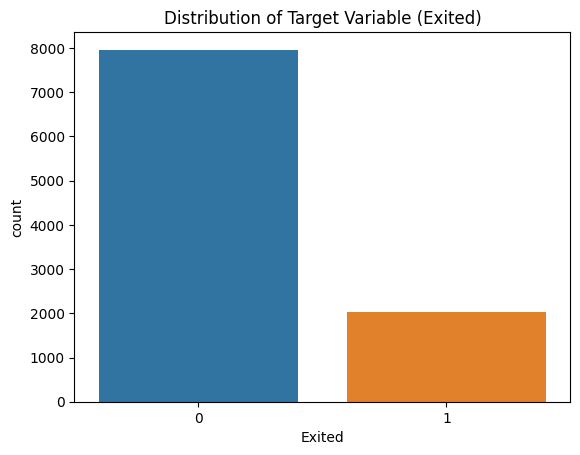

In [35]:
# Visualize the target variable distribution
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

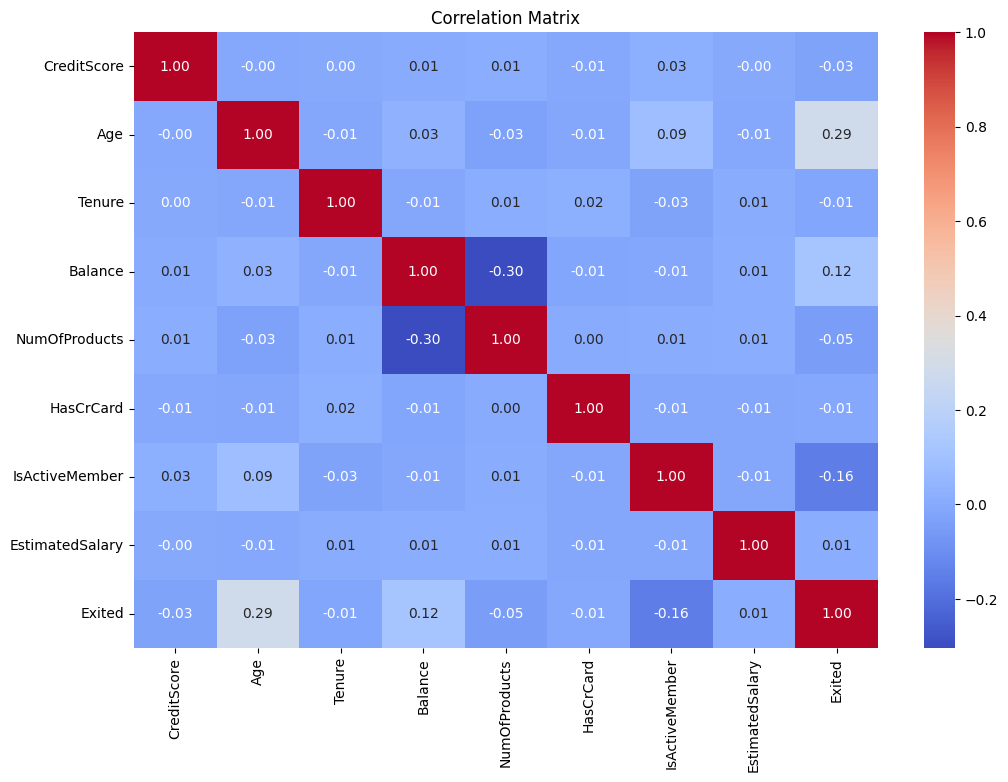

In [36]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [37]:
# Check if the specified columns exist in the DataFrame
if 'Geography' in df.columns and 'Gender' in df.columns:
    # Convert categorical variables into dummy/indicator variables
    df = pd.get_dummies(df, columns=['Geography', 'Gender'])
else:
    print("Columns 'Geography' and 'Gender' do not exist in the DataFrame.")


In [38]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

In [39]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## Model Training

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Initialize and train the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [43]:

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

Training Logistic Regression...
Training Random Forest Classifier...
Training Gradient Boosting Classifier...


## Model Evaluation

In [44]:
# Evaluate the models
for name, model in models.items():
    print(f"\n{name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75     

Thank You